In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
df = yf.download('AAPL', start = '2012-01-01', end='2023-01-01')
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416980,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622310,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754257,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734030,394024400


In [2]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782578,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010124,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.550934,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.868317,77034200


In [3]:
df = df.reset_index()

In [4]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416980,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622310,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754257,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734030,394024400


In [5]:
columns_to_drop = ['Date', 'Adj Close']
df = df.drop(columns_to_drop, axis=1)

In [6]:
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


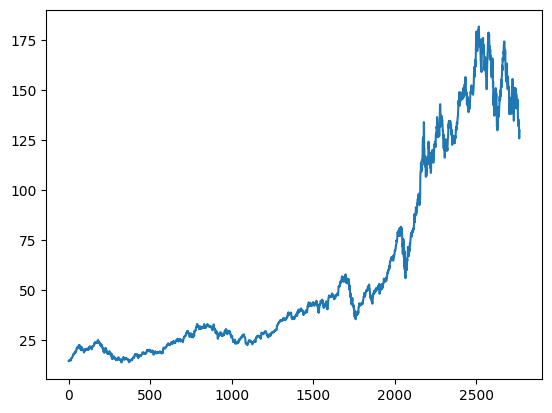

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df['Close'].rolling(100).mean()

ma200=df['Close'].rolling(200).mean()



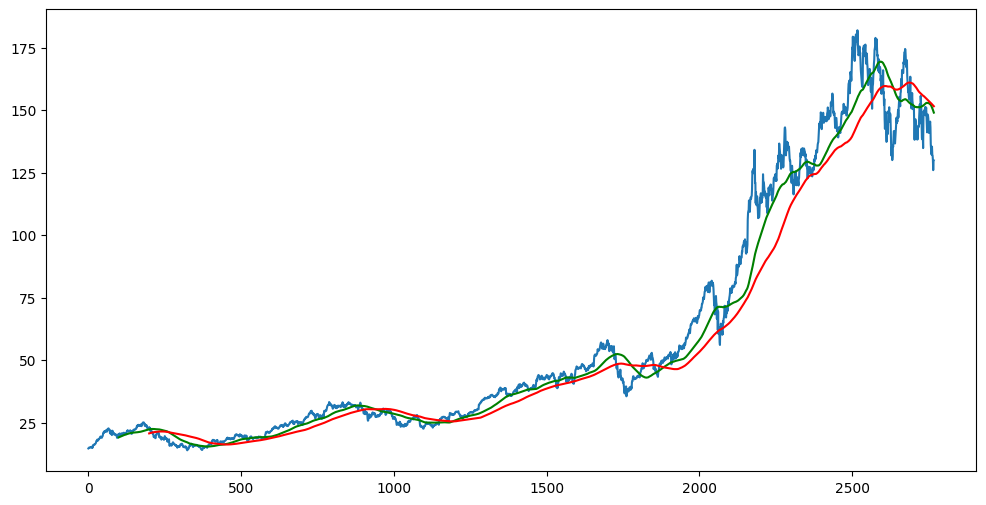

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')


In [10]:
df['Close']

0        14.686786
1        14.765714
2        14.929643
3        15.085714
4        15.061786
           ...    
2763    131.860001
2764    130.029999
2765    126.040001
2766    129.610001
2767    129.929993
Name: Close, Length: 2768, dtype: float64

In [13]:
#Splitting data into training and testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
split_index = int(len(df) * 0.7)


In [17]:
train_data = df.Close[:split_index]
test_data = df.Close[split_index:]
train_data

0       14.686786
1       14.765714
2       14.929643
3       15.085714
4       15.061786
          ...    
1932    53.542500
1933    54.174999
1934    55.897499
1935    55.772499
1936    54.687500
Name: Close, Length: 1937, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'train_data' is a pandas Series containing the column you want to scale

# Convert the Series to a NumPy array and reshape it to a 2D array
train_data_array = train_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
scaled_train_data = scaler.fit_transform(train_data_array)

# Inverse transform to get the original data (if needed)
# original_data = scaler.inverse_transform(scaled_data)

# Print the scaled data
scaled_train_data.shape # Flatten the 2D array to 1D for printing


(1937, 1)

In [19]:


x_train = []
y_train = []
i=0
for i in range (i,scaled_train_data.shape[0]-100):
    x_train.append(scaled_train_data[i:i+100])
    y_train.append(scaled_train_data[i+100,0])
x_train,y_train =np.array(x_train),np.array(y_train)



In [20]:
y_train.shape

(1837,)

In [21]:
#ML MODEL

In [22]:
from keras.layers import Dense,Dropout,LSTM


2024-07-05 07:32:56.457642: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 07:32:56.513930: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 07:32:56.577343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 07:32:56.645839: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 07:32:56.646342: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-05 07:32:56.738900: I tensorflow/core/platform/cpu_feature_guard.cc: